In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from PIL import Image

RGB
(800, 542)


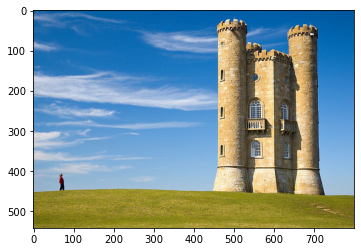

In [2]:
# Opening Image

img = Image.open('image.jpg')
print(img.mode)
print(img.size)
imshow(np.asarray(img))

In [3]:
img_array = np.array(img)
print(img_array.shape)

(542, 800, 3)


In [4]:
# Energy Calculation (M1.1)

# energy = np.zeros((img.size[1], img.size[0]))
energy = img_array.copy()

for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        neighbors = {}
        
        # Edge Cases
        if i == 0:
            neighbors['up'] = img_array[i][j]
        
        if j == 0:
            neighbors['left'] = img_array[i][j]
        
        if i == img_array.shape[0] - 1:
            neighbors['down'] = img_array[i][j]
        
        if j == img_array.shape[1] - 1:
            neighbors['right'] = img_array[i][j]
        
        # General Case
        if 'up' not in neighbors:
            neighbors['up'] = img_array[i-1][j]
        
        if 'down' not in neighbors:
            neighbors['down'] = img_array[i+1][j]
        
        if 'left' not in neighbors:
            neighbors['left'] = img_array[i][j-1]
        
        if 'right' not in neighbors:
            neighbors['right'] = img_array[i][j+1]
        
        dx_r = int(neighbors['left'][0]) - int(neighbors['right'][0])
        dx_g = int(neighbors['left'][1]) - int(neighbors['right'][1])
        dx_b = int(neighbors['left'][2]) - int(neighbors['right'][2])
        dx = (dx_r ** 2) + (dx_g ** 2) + (dx_b ** 2)
        
        dy_r = int(neighbors['up'][0]) - int(neighbors['down'][0])
        dy_g = int(neighbors['up'][1]) - int(neighbors['down'][1])
        dy_b = int(neighbors['up'][2]) - int(neighbors['down'][2])
        dy = (dy_r ** 2) + (dy_g ** 2) + (dy_b ** 2)
        
        e = np.sqrt(dx) + np.sqrt(dy)
        energy[i][j] = int(e)

print(energy.shape)
print(energy)

(542, 800, 3)
[[[ 10  10  10]
  [ 15  15  15]
  [ 18  18  18]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   3   3]
  [ 17  17  17]
  [ 12  12  12]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  8   8   8]
  [ 10  10  10]
  [ 17  17  17]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[ 96  96  96]
  [108 108 108]
  [ 13  13  13]
  ...
  [ 34  34  34]
  [ 65  65  65]
  [ 34  34  34]]

 [[154 154 154]
  [ 13  13  13]
  [ 69  69  69]
  ...
  [ 53  53  53]
  [125 125 125]
  [ 46  46  46]]

 [[ 68  68  68]
  [ 31  31  31]
  [ 74  74  74]
  ...
  [ 20  20  20]
  [ 57  57  57]
  [ 95  95  95]]]


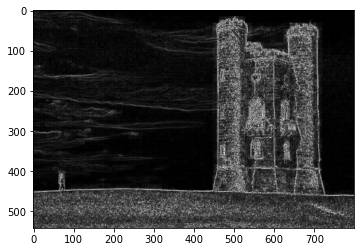

In [5]:
# Displaying Energy (M1.2)

energy_img = Image.fromarray(energy)
# energy_img.show()
imshow(np.asarray(energy_img))

In [6]:
# Computing Seams (M2)

dp_vertical = np.zeros((energy.shape[0], energy.shape[1]))

for j in range(dp_vertical.shape[1]):
    dp_vertical[0][j] = energy[0][j][0]

for i in range(1, dp_vertical.shape[0]):
    for j in range(dp_vertical.shape[1]):
        if j == 0:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j][0], energy[i-1][j+1][0])
        elif j == dp_vertical.shape[1] - 1:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0])
        else:
            dp_vertical[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0], energy[i-1][j+1][0])

pd.DataFrame(dp_vertical)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,10.0,15.0,18.0,16.0,10.0,23.0,22.0,14.0,21.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,27.0,27.0,23.0,24.0,39.0,45.0,28.0,21.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,13.0,29.0,24.0,43.0,32.0,53.0,27.0,14.0,20.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,16.0,19.0,16.0,34.0,32.0,41.0,37.0,41.0,13.0,22.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,14.0,14.0,24.0,28.0,34.0,40.0,41.0,45.0,31.0,43.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,81.0,107.0,64.0,126.0,68.0,221.0,89.0,136.0,97.0,158.0,...,103.0,72.0,140.0,81.0,63.0,133.0,31.0,162.0,81.0,139.0
538,129.0,44.0,60.0,67.0,96.0,48.0,124.0,73.0,156.0,90.0,...,89.0,88.0,76.0,132.0,73.0,54.0,89.0,58.0,200.0,190.0
539,111.0,123.0,28.0,104.0,92.0,101.0,32.0,80.0,140.0,97.0,...,97.0,62.0,59.0,112.0,211.0,206.0,184.0,75.0,106.0,165.0
540,250.0,26.0,82.0,52.0,120.0,33.0,50.0,65.0,78.0,92.0,...,126.0,65.0,97.0,95.0,206.0,159.0,220.0,87.0,159.0,80.0


In [7]:
seams = []

def vertical_seam(dp_vertical):
    seam = []
    minimum = min(dp_vertical[-1])
    print("minimum in last row: " + str(minimum))
    index = np.where(dp_vertical[-1] == minimum)
    print("index: " + "j = " + str(index[0][0]))
    i = len(dp_vertical)-1
    j = index[0][0]
    seam.append([i, j])

    for row in range(len(dp_vertical) - 1, 0, -1):
        if j == 0:
            up = dp_vertical[row-1][j]
            up_right = dp_vertical[row-1][j+1]
            if up_right < up:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        elif j == len(dp_vertical[row]) - 1:
            up = dp_vertical[row-1][j]
            up_left = dp_vertical[row-1][j-1]
            if up_left < up:
                i = row-1
                j = j-1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        else:
            up = dp_vertical[row-1][j]
            up_left = dp_vertical[row-1][j-1]
            up_right = dp_vertical[row-1][j+1]
            if up_left <= up and up_left <= up_right:
                i = row-1
                j = j-1
                seam.append([i, j])
            elif up_right <= up and up_right <= up_left:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    return seam

seams.append(vertical_seam(dp_vertical))
print(seams)

minimum in last row: 11.0
index: j = 769
[[[541, 769], [540, 770], [539, 770], [538, 771], [537, 770], [536, 769], [535, 770], [534, 769], [533, 768], [532, 767], [531, 768], [530, 767], [529, 767], [528, 768], [527, 769], [526, 768], [525, 769], [524, 770], [523, 771], [522, 772], [521, 773], [520, 773], [519, 774], [518, 775], [517, 774], [516, 775], [515, 775], [514, 774], [513, 773], [512, 774], [511, 775], [510, 776], [509, 775], [508, 776], [507, 777], [506, 777], [505, 778], [504, 777], [503, 776], [502, 776], [501, 775], [500, 774], [499, 773], [498, 772], [497, 772], [496, 772], [495, 772], [494, 773], [493, 772], [492, 772], [491, 773], [490, 773], [489, 774], [488, 773], [487, 772], [486, 773], [485, 772], [484, 773], [483, 774], [482, 775], [481, 776], [480, 777], [479, 777], [478, 777], [477, 778], [476, 779], [475, 778], [474, 779], [473, 778], [472, 779], [471, 778], [470, 777], [469, 776], [468, 777], [467, 776], [466, 776], [465, 775], [464, 775], [463, 775], [462, 774

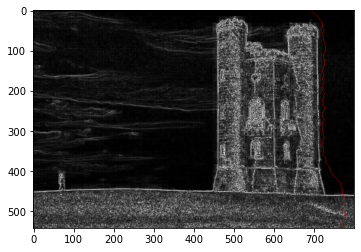

In [8]:
for coord in seams[0]:
    energy[coord[0]][coord[1]] = [255, 0 ,0]

energy_img = Image.fromarray(energy)
imshow(np.asarray(energy_img))
energy_img.show()